In [1]:
# Import the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

# **Chess Model**

In [2]:
# Visualize Dataset
url = "../input/chessman-image-dataset/chessman-image-dataset/Chessman-image-dataset/Chess"
dir_chess = pathlib.Path(url)
length = len(list(dir_chess.glob('*/*.*')))
print(f"The length of Dataset is: {length}")

The length of Dataset is: 556


## **Exploring data**

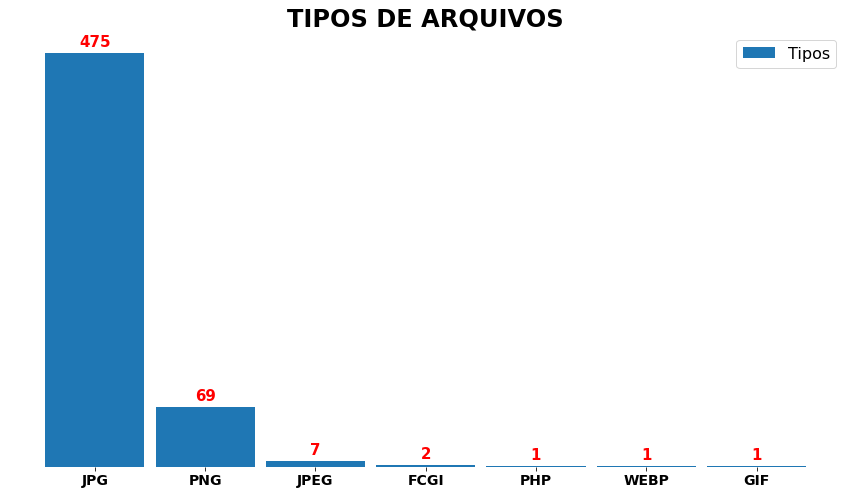

In [3]:
# Verificando os Tipos de Arquivos
def tipo_arquivo(diretorio):
    tipo = []
    for _, _, arquivos in tf.io.gfile.walk(diretorio):
        for arquivo in arquivos:
            tipo.append(arquivo.upper().split('.')[-1])
    return tipo

def extract_class(diretorio):
    classes = []
    for diretorio, _, arquivos in tf.io.gfile.walk(diretorio):
            for arquivo in arquivos:
                classes.append(diretorio.split('/')[-1])
    return classes

# Plotando os Tipos de arquivos:
tp = pd.Series(tipo_arquivo(dir_chess))
labels = tp.unique()
y = tp.value_counts()


width = 0.9  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
bar = ax.bar(labels, y, width, label='Tipos')

# Formating Barchart
ax.legend(fontsize=16)
ax.bar_label(bar, padding=3, fontsize=15, color='r', fontweight='bold')
ax.set_title('TIPOS DE ARQUIVOS', fontweight= 'bold', fontsize=24)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(labels)

# Retirando excessos no Gráfico
ax.axes.yaxis.set_visible(False) # Retirando os valores de Y

ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticklabels(labels, fontweight= 'bold')
plt.show()

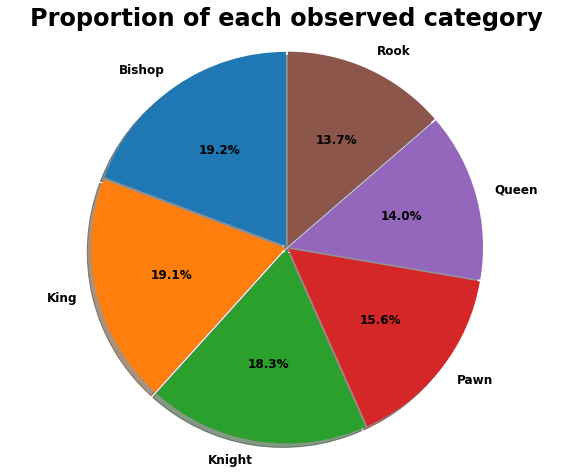

In [4]:
class_pieces = pd.Series(extract_class(dir_chess))
labels = np.unique(class_pieces.values)
explode = (np.arange(0,len(labels)) * 0) + 0.01
plt.figure(figsize=(10,8))
plt.pie(class_pieces.value_counts(), labels = labels,autopct='%1.1f%%', shadow=True,
        startangle=90,
        textprops={"fontsize":12, 'fontweight':'bold'},
       explode = explode)  # Pie chart
plt.axis('equal')
plt.title('Proportion of each observed category', fontsize=24, fontweight='bold')  # Proportion per category
plt.show()

In [5]:
def display_examples(class_names, images, labels, title='Some examples of images of the dataset'):
    """Display 25 images"""
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(title, fontsize=26, fontweight='bold')
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        images = np.squeeze(images)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[0][i]], fontweight='bold', fontsize=14)
    plt.show()

Found 552 files belonging to 6 classes.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

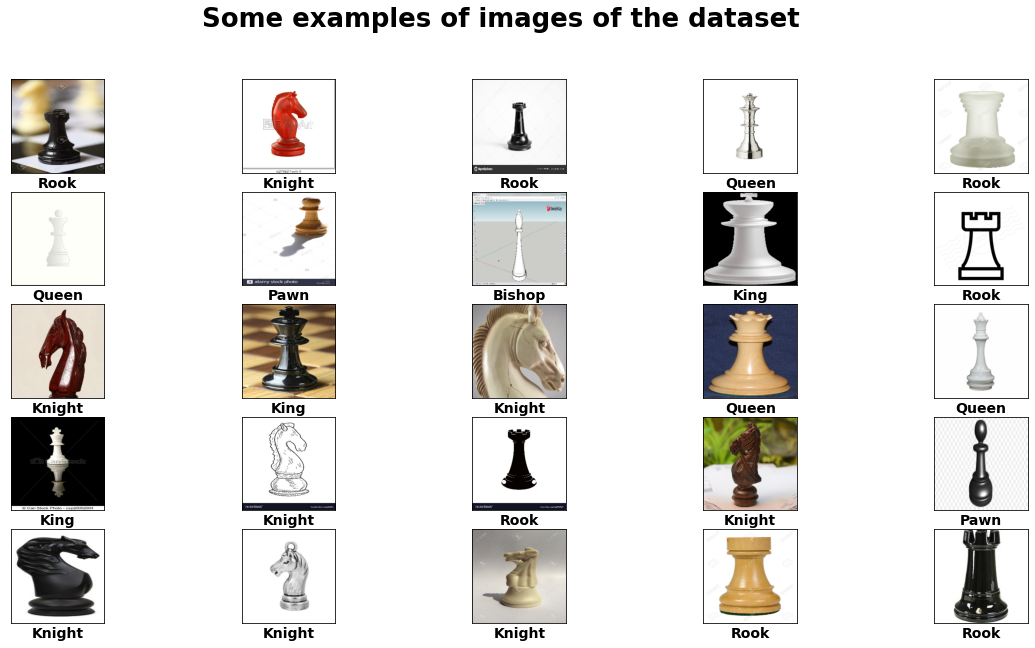

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory=dir_chess)
class_names = train_ds.class_names
image, label = [], []
for images, labels in train_ds.take(1):
    image.append(images/255.)
    label.append(labels.numpy().astype(int))

display_examples(class_names=class_names, images=image, labels=label)

In [7]:
# Inspecionando as Imagens para verificar os tamanhos

for i, example in enumerate(train_ds.take(5)):
    print('Batch {} shape: {} label: {}'.format(i+1, example[0].shape,example[1]))

Batch 1 shape: (32, 256, 256, 3) label: [3 5 4 5 1 1 5 0 5 5 5 5 4 1 3 5 0 2 3 2 1 5 0 2 2 4 0 1 3 2 0 2]
Batch 2 shape: (32, 256, 256, 3) label: [2 1 2 1 3 2 3 3 2 4 0 0 3 5 1 5 2 3 0 5 2 2 1 5 2 0 4 5 2 2 2 3]
Batch 3 shape: (32, 256, 256, 3) label: [2 2 5 1 5 3 0 4 3 3 3 3 5 5 3 5 3 2 2 3 1 1 3 0 4 3 1 4 2 4 5 5]
Batch 4 shape: (32, 256, 256, 3) label: [0 5 0 0 2 4 2 1 0 2 0 0 2 3 5 4 1 4 1 2 0 0 5 4 1 5 1 2 5 5 0 4]
Batch 5 shape: (32, 256, 256, 3) label: [0 5 0 3 0 5 1 3 5 4 4 4 0 0 5 1 2 1 2 5 2 1 3 2 2 0 2 0 5 1 5 3]


## Reformating Images

In [8]:
IMAGE_RES = 256
def scale(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory=dir_chess,
                                                       subset='training',
                                                       validation_split=0.2,
                                                       seed= 0)

test_ds = tf.keras.utils.image_dataset_from_directory(directory=dir_chess,
                                                        subset='validation',
                                                        validation_split=0.2,
                                                        seed=0,)

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [10]:
for img, lbl in train_ds.take(1):
    img.shape, lbl.shape
piece_shape, just_img = img.shape[1:], img.shape[1:3]

print (f"Piece of Shape: {piece_shape} - Just Image: {just_img}")

Piece of Shape: (256, 256, 3) - Just Image: (256, 256)


## Building Pipeline

In [11]:
SHUFFLE_SIZE = 100
train_fds = train_ds.map(scale).shuffle(SHUFFLE_SIZE).cache().prefetch(1)
test_fds = test_ds.map(scale).cache().prefetch(1)

# Build the Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = len(class_names) # Get the number classes

# Clear and set random seed
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

# Create a Multilayer CNN
chess_model = tf.keras.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=piece_shape),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])

# Compile and Train Model
EPOCH = 20

chess_model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = chess_model.fit(
    train_fds,
    validation_data=test_fds,
    epochs=EPOCH)

Epoch 1/20
14/14 [==============================] - 13s 679ms/step - loss: 2.1501 - accuracy: 0.1900 - val_loss: 1.7891 - val_accuracy: 0.2000
Epoch 2/20
14/14 [==============================] - 9s 665ms/step - loss: 1.7463 - accuracy: 0.2421 - val_loss: 1.7680 - val_accuracy: 0.3000
Epoch 3/20
14/14 [==============================] - 9s 639ms/step - loss: 1.6061 - accuracy: 0.3846 - val_loss: 1.7518 - val_accuracy: 0.2364
Epoch 4/20
14/14 [==============================] - 9s 627ms/step - loss: 1.3547 - accuracy: 0.4615 - val_loss: 1.8845 - val_accuracy: 0.2909
Epoch 5/20
14/14 [==============================] - 9s 670ms/step - loss: 1.0809 - accuracy: 0.5995 - val_loss: 2.0226 - val_accuracy: 0.3273
Epoch 6/20
14/14 [==============================] - 9s 628ms/step - loss: 0.8347 - accuracy: 0.6968 - val_loss: 2.2557 - val_accuracy: 0.3636
Epoch 7/20
14/14 [==============================] - 9s 645ms/step - loss: 0.6056 - accuracy: 0.7964 - val_loss: 3.2020 - val_accuracy: 0.3182
Epoch

## Visualize Performance

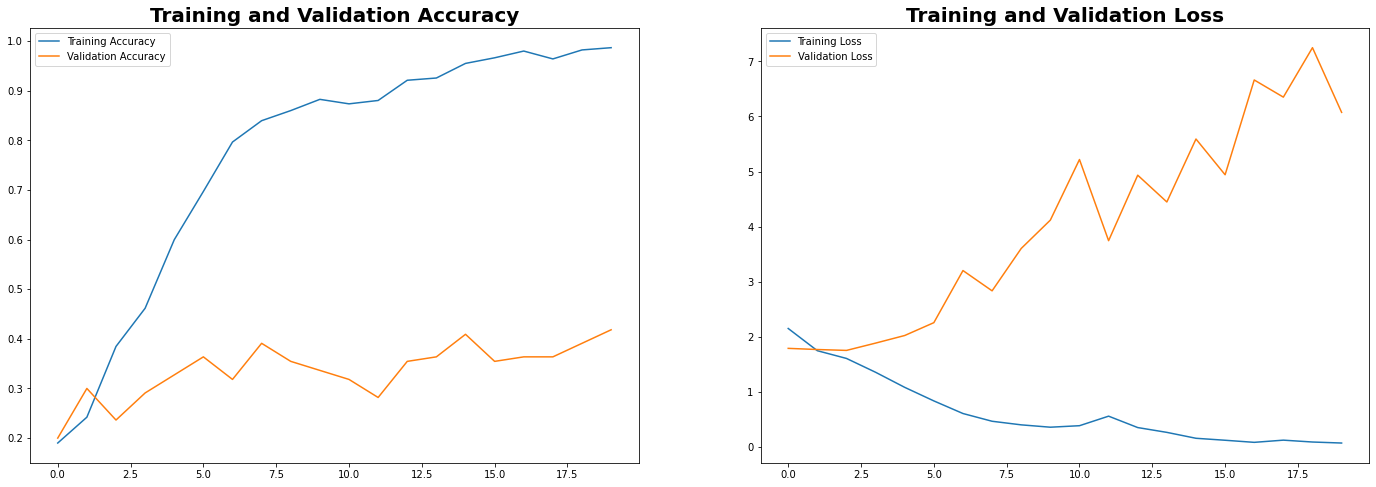

In [12]:
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(EPOCH)
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.title('Training and Validation Accuracy', fontsize=20, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.title('Training and Validation Loss', fontsize=20, fontweight='bold')
    plt.show()

plot_accuracy_loss(history)

## Applying Augmentation

Image shape: (32, 256, 256, 3)


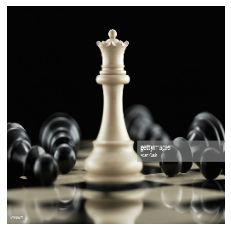

In [13]:
idx = 0
for batch_images, _ in train_fds.take(1):
    print(f"Image shape: {batch_images.shape}")
    
our_image = batch_images[idx]
plt.imshow(our_image)
plt.axis('off')
plt.grid(visible=None)
plt.show()

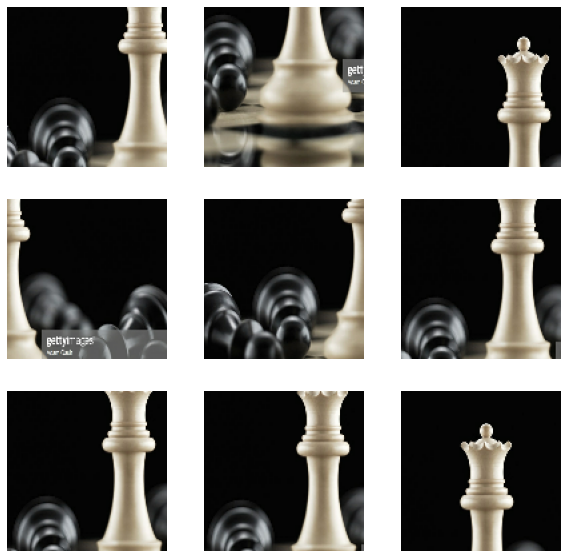

In [14]:
# Create a Functions to Show Images
def show(original_img, trans_img):
    f = plt.figure(figsize=(6, 6))
    f.add_subplot(1,2,1)
    plt.imshow(original_img)
    plt.axis('off')
    f.add_subplot(1,2,2)
    plt.imshow(trans_img)
    plt.axis('off')
    plt.show(block=True)

def show_images(img, indx, trans, p1=None, p2=None, b=False):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        if not b:
            new_img = trans(img[indx])
        elif p2==None:
            new_img = trans(img[indx], p1)
            new_img = np.clip(new_img, 0, 1)
        else:
            new_img = trans(img[indx], p1, p2)
            new_img = np.clip(new_img, 0, 1)
        plt.imshow(new_img)
        plt.axis('off')

# Crop an Image
new_image = tf.image.random_crop(our_image, [120, 120, 3])
show_images(batch_images, idx, tf.image.random_crop,[120, 120, 3], b=True)

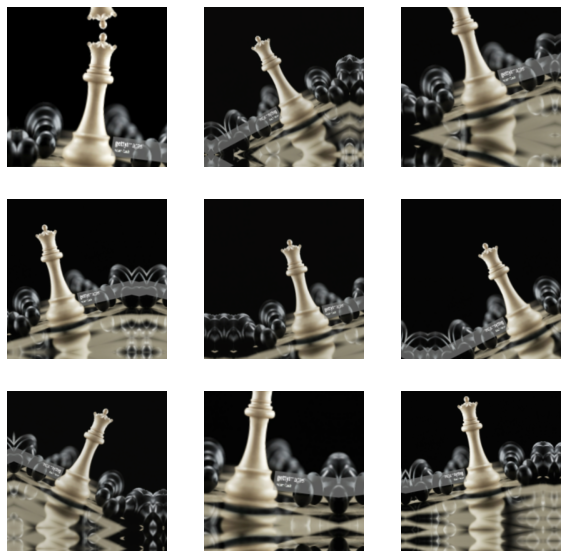

In [15]:
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomTranslation
from tensorflow.keras.layers import RandomContrast

data_augmentation = tf.keras.Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.2),
    RandomContrast(0.1),
    RandomTranslation(height_factor=0.2, width_factor=0.2)
    ])
plt.figure(figsize=(10, 10))
for images, _ in train_fds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0])
        plt.axis('off')

In [16]:
# Import Model
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

# Create a Multilayer CNN
chess_model = tf.keras.Sequential([
    data_augmentation, # Include New Layer
    Conv2D(32, 3, activation='relu',
    input_shape=piece_shape),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])

# Compile and Train Model
EPOCH = 20
optimizer = tf.keras.optimizers.SGD()

chess_model.compile(
    optimizer = optimizer,
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = chess_model.fit(
    train_fds,
    validation_data=test_fds,
    epochs=EPOCH)

Epoch 1/20
14/14 [==============================] - 14s 879ms/step - loss: 1.7857 - accuracy: 0.2127 - val_loss: 1.7858 - val_accuracy: 0.2182
Epoch 2/20
14/14 [==============================] - 12s 840ms/step - loss: 1.7815 - accuracy: 0.2081 - val_loss: 1.7864 - val_accuracy: 0.2273
Epoch 3/20
14/14 [==============================] - 13s 903ms/step - loss: 1.7760 - accuracy: 0.2104 - val_loss: 1.7871 - val_accuracy: 0.2000
Epoch 4/20
14/14 [==============================] - 12s 877ms/step - loss: 1.7773 - accuracy: 0.2172 - val_loss: 1.7860 - val_accuracy: 0.2091
Epoch 5/20
14/14 [==============================] - 12s 885ms/step - loss: 1.7741 - accuracy: 0.2195 - val_loss: 1.7856 - val_accuracy: 0.2000
Epoch 6/20
14/14 [==============================] - 13s 898ms/step - loss: 1.7718 - accuracy: 0.2172 - val_loss: 1.7856 - val_accuracy: 0.1909
Epoch 7/20
14/14 [==============================] - 12s 893ms/step - loss: 1.7723 - accuracy: 0.2240 - val_loss: 1.7853 - val_accuracy: 0.1909

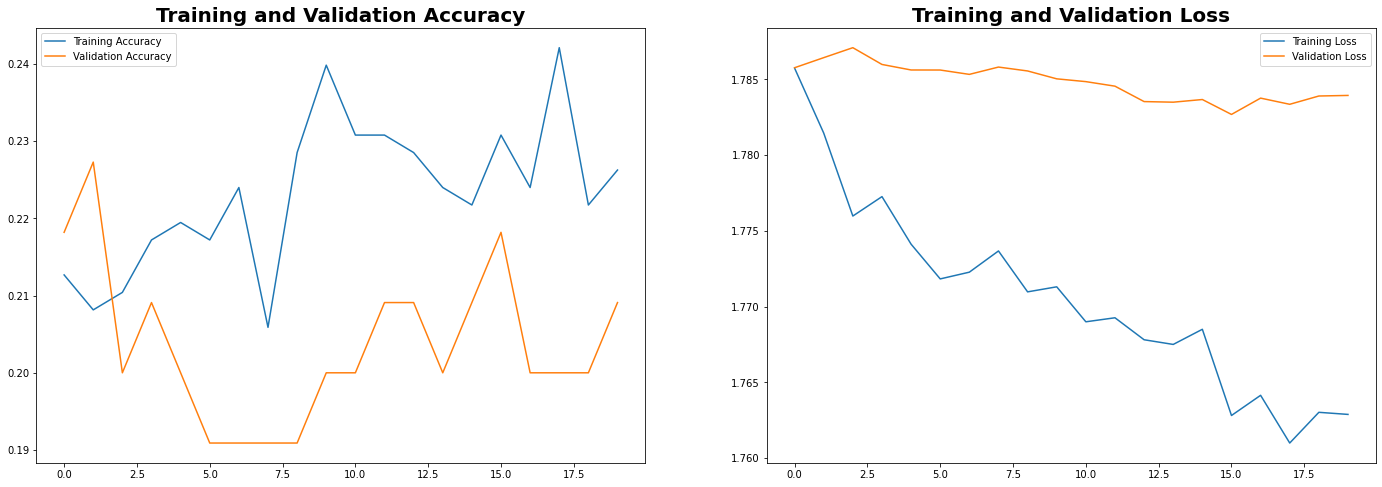

In [17]:
# Plotting Accuracy
plot_accuracy_loss(history)

In [18]:
## Vamos mexer na Learning Rate e verificar se temos parâmetros melhores.
initial_history = chess_model.fit(
    train_fds,
    validation_data=test_fds,
    epochs=EPOCH,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
    )
    ]
)

Epoch 1/20
14/14 [==============================] - 13s 923ms/step - loss: 1.7571 - accuracy: 0.2240 - val_loss: 1.7844 - val_accuracy: 0.2091
Epoch 2/20
14/14 [==============================] - 13s 952ms/step - loss: 1.7555 - accuracy: 0.2330 - val_loss: 1.7853 - val_accuracy: 0.2182
Epoch 3/20
14/14 [==============================] - 13s 922ms/step - loss: 1.7582 - accuracy: 0.2443 - val_loss: 1.7859 - val_accuracy: 0.2273
Epoch 4/20
14/14 [==============================] - 14s 982ms/step - loss: 1.7497 - accuracy: 0.2240 - val_loss: 1.7870 - val_accuracy: 0.2000
Epoch 5/20
14/14 [==============================] - 13s 932ms/step - loss: 1.7461 - accuracy: 0.2670 - val_loss: 1.7880 - val_accuracy: 0.1909
Epoch 6/20
14/14 [==============================] - 13s 920ms/step - loss: 1.7515 - accuracy: 0.2421 - val_loss: 1.7889 - val_accuracy: 0.1818
Epoch 7/20
14/14 [==============================] - 13s 945ms/step - loss: 1.7531 - accuracy: 0.2647 - val_loss: 1.7895 - val_accuracy: 0.1727

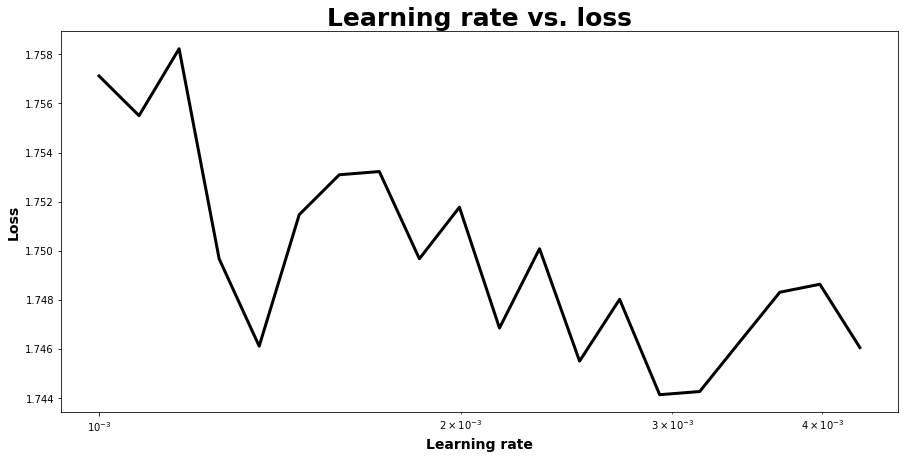

In [19]:
learning_rates = 1e-3 * (10 ** (np.arange(EPOCH) / 30))
plt.figure(figsize=(15,7))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)

plt.title('Learning rate vs. loss', size=25, fontweight='bold')
plt.xlabel('Learning rate', size=14, fontweight='bold')
plt.ylabel('Loss', size=14, fontweight='bold')
plt.show()

In [20]:
inital_ds = pd.DataFrame(initial_history.history)
index_min_loss = inital_ds['loss'].idxmin() 
best_lr_loss = inital_ds['lr'][index_min_loss]
print(f"The best learning rate (Loss): {best_lr_loss:.2}")

The best learning rate (Loss): 0.0029


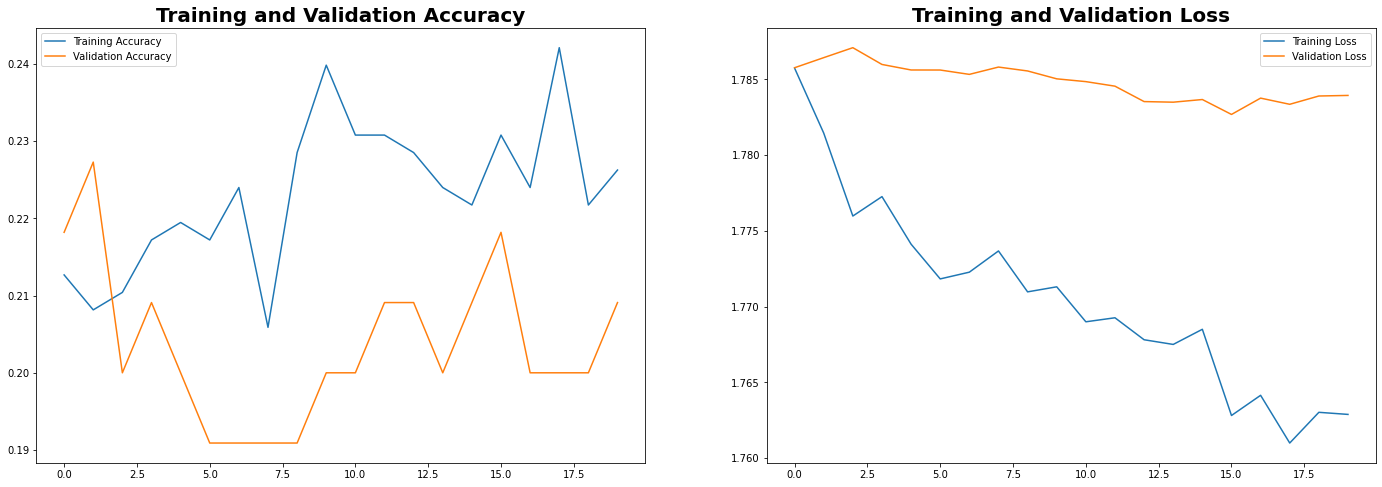

In [21]:
plot_accuracy_loss(history)

## Transfer Learning

In [22]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def format_image(image, label):
    image = tf.image.resize(image, (224, 224)) /255.0
    return image, label

train_batches = train_ds.shuffle(100).map(format_image).prefetch(1)
test_batches = test_ds.map(format_image).prefetch(1)

# Extract Pre-trained Model (imagenet21k_b0)
url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2"

feature_extration_nm = hub.KerasLayer( url, input_shape=(224, 224, 3))

In [23]:
# Freeze Pre-Trained Model
feature_extration_nm.trainable = False

# Clear and seed
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

chess_model_pt = tf.keras.Sequential([
    feature_extration_nm,
    Dropout(0.5),
    Dense(num_classes)
    
])

# Compile and Train Model
optimizer = tf.keras.optimizers.Adam()
chess_model_pt.compile(
    optimizer=optimizer,
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

EPOCH = 20
history = chess_model_pt.fit(
    train_batches,
    validation_data=test_batches,
    epochs=EPOCH)

Epoch 1/20
14/14 [==============================] - 30s 1s/step - loss: 2.6574 - accuracy: 0.2353 - val_loss: 1.4336 - val_accuracy: 0.5545
Epoch 2/20
14/14 [==============================] - 19s 1s/step - loss: 1.9221 - accuracy: 0.3801 - val_loss: 1.0096 - val_accuracy: 0.6273
Epoch 3/20
14/14 [==============================] - 19s 1s/step - loss: 1.4933 - accuracy: 0.5226 - val_loss: 0.8727 - val_accuracy: 0.6727
Epoch 4/20
14/14 [==============================] - 18s 1s/step - loss: 1.3400 - accuracy: 0.5339 - val_loss: 0.7966 - val_accuracy: 0.6818
Epoch 5/20
14/14 [==============================] - 18s 1s/step - loss: 1.1872 - accuracy: 0.6086 - val_loss: 0.7241 - val_accuracy: 0.7091
Epoch 6/20
14/14 [==============================] - 18s 1s/step - loss: 1.0008 - accuracy: 0.6516 - val_loss: 0.7262 - val_accuracy: 0.7364
Epoch 7/20
14/14 [==============================] - 17s 1s/step - loss: 0.9105 - accuracy: 0.6629 - val_loss: 0.6829 - val_accuracy: 0.7182
Epoch 8/20
14/14 [==

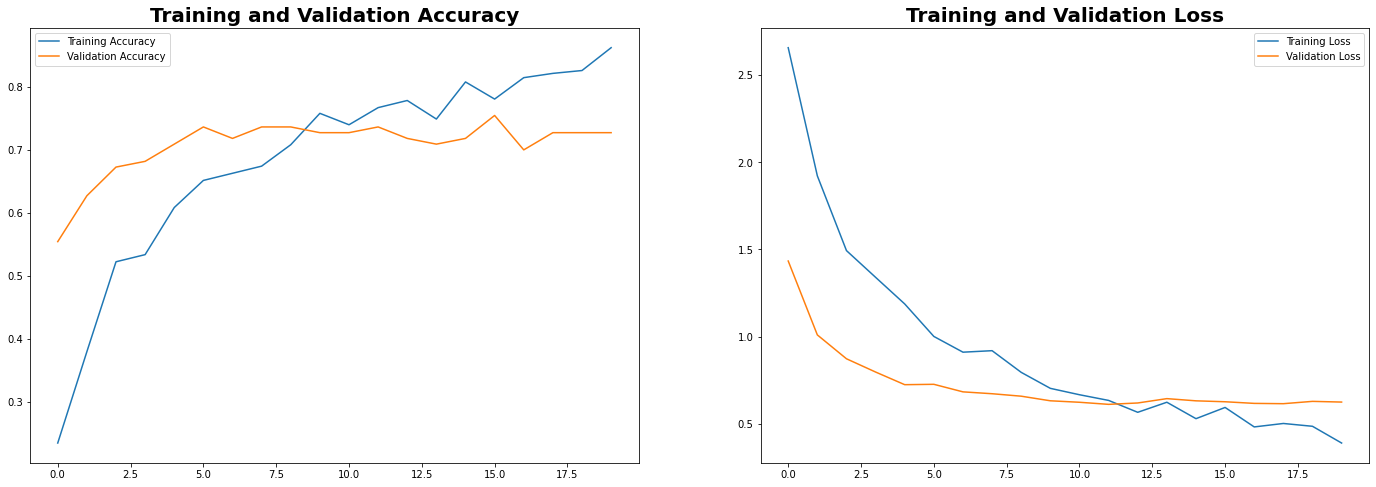

In [24]:
# Plot Visualization
plot_accuracy_loss(history)

In [25]:
test_loss, test_accuracy = chess_model_pt.evaluate(test_batches)  # Evaluate on Test Set
print('Test accuracy: {:.2f}% loss: {:.2f}'.format(test_accuracy * 100, test_loss))

4/4 [==============================] - 3s 641ms/step - loss: 0.6244 - accuracy: 0.7273
Test accuracy: 72.73% loss: 0.62


In [26]:
## Vamos mexer na Learning Rate e verificar se temos parâmetros melhores.
initial_history = chess_model_pt.fit(
    train_batches,
    validation_data=test_batches,
    epochs=EPOCH,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
    )
    ]
)

Epoch 1/20
14/14 [==============================] - 17s 1s/step - loss: 0.4493 - accuracy: 0.8326 - val_loss: 0.6369 - val_accuracy: 0.7182
Epoch 2/20
14/14 [==============================] - 16s 1s/step - loss: 0.4224 - accuracy: 0.8620 - val_loss: 0.6339 - val_accuracy: 0.7182
Epoch 3/20
14/14 [==============================] - 16s 984ms/step - loss: 0.3738 - accuracy: 0.8688 - val_loss: 0.6313 - val_accuracy: 0.7182
Epoch 4/20
14/14 [==============================] - 16s 990ms/step - loss: 0.3604 - accuracy: 0.8620 - val_loss: 0.6202 - val_accuracy: 0.7273
Epoch 5/20
14/14 [==============================] - 16s 1s/step - loss: 0.3431 - accuracy: 0.8620 - val_loss: 0.6422 - val_accuracy: 0.7455
Epoch 6/20
14/14 [==============================] - 16s 989ms/step - loss: 0.3822 - accuracy: 0.8620 - val_loss: 0.6324 - val_accuracy: 0.7545
Epoch 7/20
14/14 [==============================] - 17s 1s/step - loss: 0.3587 - accuracy: 0.8643 - val_loss: 0.6395 - val_accuracy: 0.7455
Epoch 8/20


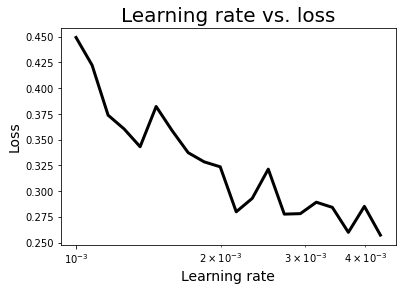

In [27]:
learning_rates = 1e-3 * (10 ** (np.arange(EPOCH) / 30))

plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.show()

In [28]:
inital_ds = pd.DataFrame(initial_history.history)
index_min_loss = inital_ds['loss'].idxmin() 
best_lr_loss = inital_ds['lr'][index_min_loss]
print(f"The best learning rate (Loss): {best_lr_loss:.2}")

The best learning rate (Loss): 0.0043


In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
optimizer = tf.keras.optimizers.Adam(learning_rate=best_lr_loss)
chess_model_pt.compile(
    optimizer=optimizer,
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

EPOCH = 100
history = chess_model_pt.fit(
    train_batches,
    validation_data=test_batches,
    epochs=EPOCH,
    callbacks=callback)

Epoch 1/100
14/14 [==============================] - 22s 1s/step - loss: 0.3115 - accuracy: 0.8869 - val_loss: 0.7776 - val_accuracy: 0.7455
Epoch 2/100
14/14 [==============================] - 16s 1s/step - loss: 0.2539 - accuracy: 0.9163 - val_loss: 0.8156 - val_accuracy: 0.7091
Epoch 3/100
14/14 [==============================] - 17s 1s/step - loss: 0.3125 - accuracy: 0.8801 - val_loss: 0.8911 - val_accuracy: 0.7091
Epoch 4/100
14/14 [==============================] - 16s 1s/step - loss: 0.3973 - accuracy: 0.8575 - val_loss: 0.8848 - val_accuracy: 0.7545
Epoch 5/100
14/14 [==============================] - 17s 1s/step - loss: 0.3044 - accuracy: 0.8778 - val_loss: 1.0667 - val_accuracy: 0.6909
Epoch 6/100
14/14 [==============================] - 16s 1s/step - loss: 0.3367 - accuracy: 0.8733 - val_loss: 1.0342 - val_accuracy: 0.6909
Epoch 7/100
14/14 [==============================] - 16s 1s/step - loss: 0.2902 - accuracy: 0.8891 - val_loss: 1.0111 - val_accuracy: 0.7091
Epoch 8/100
1

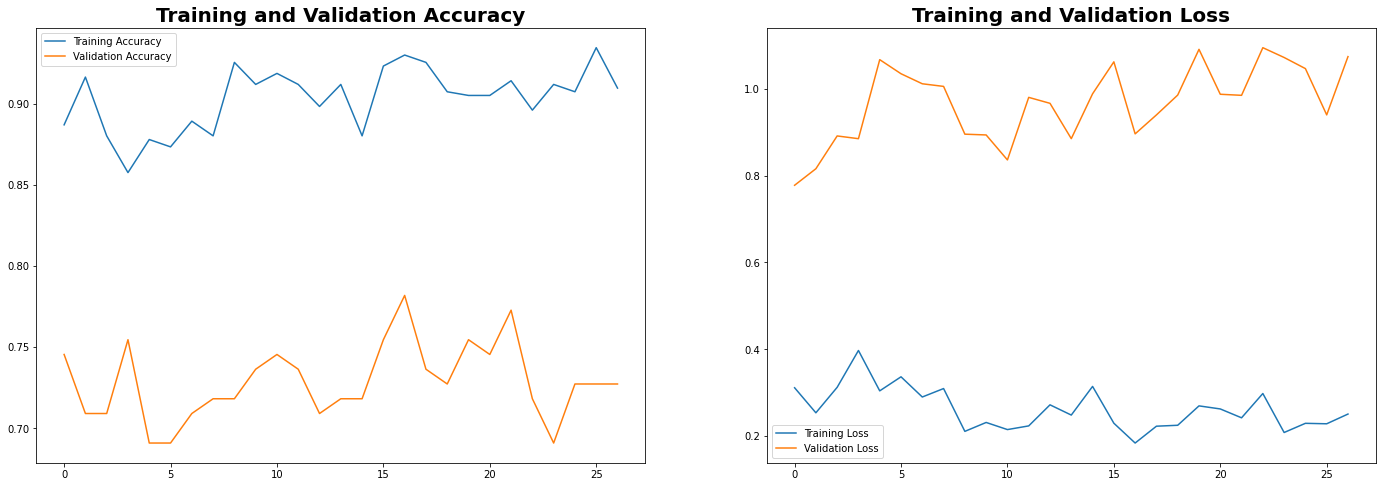

In [30]:
EPOCH = len(history.history['loss'])
plot_accuracy_loss(history)

## Predicitions 

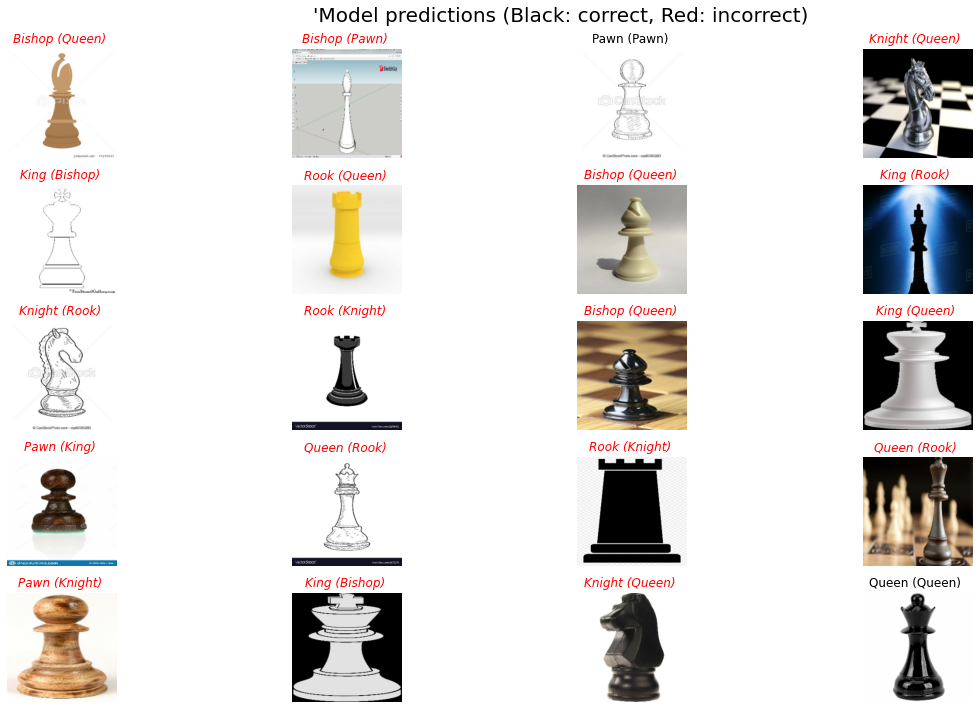

In [31]:
im_image_batch, im_label_batch = next(iter(test_batches))
im_images = im_image_batch.numpy()
im_labels = im_label_batch.numpy()

im_named_labels = [class_names[im_labels[i]] for i, lbl in enumerate(range(32))]

im_named_pred = pred_ks = np.argmax(chess_model_pt.predict(test_batches), axis=-1)

# Plotting Predictions
# Plot the first X (num_rows * num_cols) test images
# (true and predicted labels)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.suptitle("'Model predictions (Black: correct, Red: incorrect)", fontsize=20)
for i in range(num_images):
  ax = plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(im_images[i])
  title = class_names[im_labels[i]] + ' (' + class_names[im_named_pred[i]] + ') '
  plt.title(title)
  if class_names[int(im_labels[i])] != class_names[im_named_pred[i]]:
    ax.set_title(title, style='italic', color='red')
  plt.axis('off')
plt.tight_layout()